Высокая цель: уменшить размерность векторного представления слов текстуальных данных.Построить граифики уменьшения размерности. 
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
4. Построить график объема информации. 

V2
12.01.24
Anatoly

In [9]:
import numpy as np
import pandas as pd
import spacy 
import string
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nlp = spacy.load("ru_core_news_sm") 
file_path = 'C:/Users/qiarr/Desktop/task/lesson 17/1.txt'

In [10]:
with open(file_path, "r", encoding="cp1251") as file:
    text = file.read()
    


In [11]:
print(text)

Скотный Двор
Джордж Оруэлл


Притча, полная юмора и сарказма. Может ли скромная ферма стать символом тоталитарного общества? Конечно, да. Но… каким увидят это общество его «граждане» – животные, обреченные на бойню?





Джордж Оруэлл

Скотный Двор





George Orwell

ANIMAL FARM

Печатается с разрешения The Estate of the late Sonia Brownell Orwell и литературных агентств AM Heath & Co Ltd. и Andrew Nurnberg.

© George Orwell, 1949

© Перевод. Л.Г. Беспалова, 2013

© Издание на русском языке AST Publishers, 2014







Глава I


Мистер Джонс, хозяин Господского Двора, запер на ночь курятник, но про лазы для молодняка спьяну забыл. Фонарь в его руке ходил ходуном, круг света метался из стороны в сторону, когда он, выписывая вензеля, прошел к черному ходу, скинул сапоги, нацедил в кладовке свою последнюю в этот день кружку пива из бочки и залез в кровать, где уже задавала храпака миссис Джонс.

Едва в спальне погас свет, во всех службах послышались шорох и шуршание. Днем прошел слух, что

In [12]:
def preproc(file_path):
    '''
    Функция принимает название файла filename и возвращает:
    - список слов после удаления пунктуации и стоп-слов, лемматизации;
    - словарь уникальных слов (keys) и их частоту (values) с тексте.
    '''    
    with open(file_path, "r", encoding="cp1251") as file:
      text = file.read() # читаем файл   
    
    stop_words = spacy.lang.ru.stop_words.STOP_WORDS # часто используемые слова без смысла
    punctuations = string.punctuation # пунктуация

    doc = nlp(text)
    
    text_lemm = [word.lemma_.lower().strip() if  # исключение местоимений из lemma и перевод остальных слов в lemma
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]
    
    text_clear = [word for word in text_lemm if # убираем пунктуацию и стоп-слова
                  word not in stop_words and 
                  word not in punctuations]
    
    unic_words = set(text_clear)
    
    print('Количество слов в тексте: '
          '{}.'.format(len(text_clear)))
    print('Количество уникальных слов в тексте: '
          '{}.\n'.format(len(unic_words)))
    
    return text_clear, unic_words

In [13]:
my_text, unic_words= preproc(file_path)
# присваивание массва с очищенным текстом и массива с уникальными словами


Количество слов в тексте: 3359.
Количество уникальных слов в тексте: 1770.



In [14]:
print(my_text)

['скотный', 'двор', 'джордж', 'оруэлл', 'притча', 'полный', 'юмор', 'сарказм', 'скромный', 'ферма', 'символ', 'тоталитарный', 'общество', '…', 'увидеть', 'общество', 'гражданин', '–', 'животное', 'обречь', 'бойня', 'джордж', 'оруэлл', 'скотный', 'двор', 'george', 'orwell', 'animal', 'farm', 'печататься', 'разрешение', 'the', 'estate', 'of', 'the', 'late', 'sonia', 'brownell', 'orwell', 'литературный', 'агентство', 'am', 'heath', 'co', 'ltd', 'andrew', 'nurnberg', '©', 'george', 'orwell', '1949', '©', 'перевод', 'л.г.', 'беспалов', '2013', '©', 'издание', 'русский', 'язык', 'ast', 'publishers', '2014', 'глава', 'i', 'мистер', 'джонс', 'хозяин', 'господский', 'двор', 'запереть', 'ночь', 'курятник', 'лаз', 'молодняк', 'спьяну', 'забыть', 'фонарь', 'рука', 'ходить', 'ходун', 'круг', 'свет', 'метался', 'сторона', 'сторона', 'выписывая', 'вензеля', 'пройти', 'чёрный', 'ход', 'скинуть', 'сапог', 'нацедить', 'кладовка', 'последний', 'день', 'кружка', 'пиво', 'бочка', 'залезть', 'кровать', 'зад

In [15]:
word_vectors = [nlp(word)[0].vector for word in unic_words] # оптимизированный перевод в вектора v2
 
# Вычисляем размеры векторов
vector_sizes = [np.linalg.norm(vector) for vector in word_vectors]

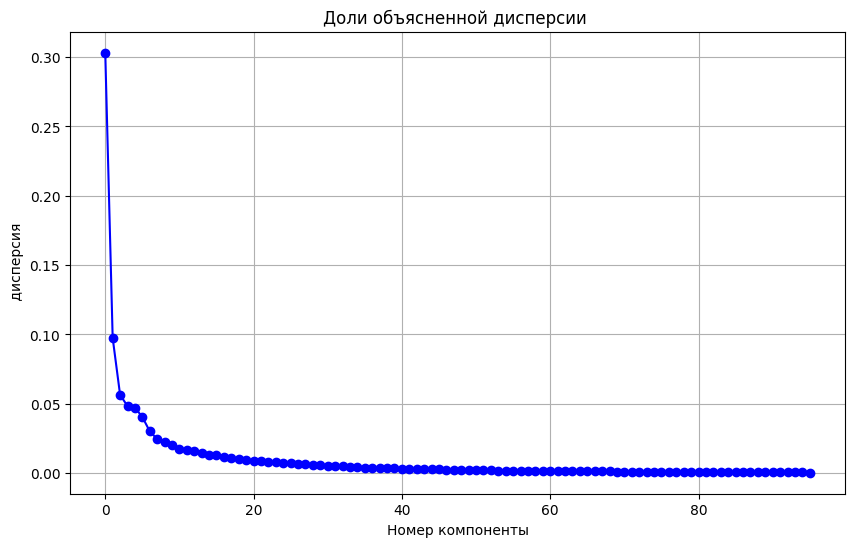

In [16]:


pca = PCA()
pca.fit(word_vectors)
explained_variance_ratios = pca.explained_variance_ratio_
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratios, marker='o', linestyle='-', color='b')
plt.title('график падения объема информации (дисперсии) в зависимости от сохраняемой размерности')
plt.xlabel('Номер компоненты')
plt.ylabel('Дисперсия')
plt.grid(True)
plt.show()

в итоге был построен график,был сделан анализ текста,понижение размерности и его векторизация